<a href="https://colab.research.google.com/github/Praneeth-18/NLP/blob/main/DashOfData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Cleaning**

# Getting The Data

In [ ]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="ast-container").find_all('p')]
    print(url)
    return text

# URLs of transcripts in scope
urls = ['http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
        'https://scrapsfromtheloft.com/comedy/bo-burnham-what-transcript/',
        'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/']

# Comedian names
comedians = ['louis', 'dave', 'ricky', 'bo', 'bill', 'jim']

In [ ]:
transcripts = [url_to_transcript(u) for u in urls]

http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/
http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/
http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/
https://scrapsfromtheloft.com/comedy/bo-burnham-what-transcript/
http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/
http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/


In [ ]:
data = {comedians[i]: transcripts[i] for i in range(len(comedians))}

In [ ]:
data.keys()

dict_keys(['louis', 'dave', 'ricky', 'bo', 'bill', 'jim'])

In [ ]:
data['louis'][:2]

['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.',
 '“The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, it’s re

# Cleaning The Data

In [ ]:
next(iter(data.keys()))

'louis'

In [ ]:
next(iter(data.values()))


['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.',
 '“The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, it’s re

In [ ]:
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [ ]:
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}


In [ ]:
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...
ricky,Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonigh...


In [ ]:
data_df.transcript.loc['bill']


'[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a pleasure to be here in the greater Atlanta, Georgia, area, this oasis. It’s nice to be here. I don’t know why I came here in June. It’s nice to be here. Wasn’t thinking. Fucking ridiculously hot out there. Just miserable, horrible. That kind of heat, you understand the racism down here, ya know? I get it. How would you get along with anybody? “Look at ’em just over there, drinkin’ a cold drink! Lemonade was made for the white man!” So… What the hell have I been doing with my life? Trying to get in shape, man. But I hate going to the gym, so I decided I’d go veggie twice a week. It’s brutal. I can only make it till about 5:00. Five o’clock, that’s what I realized about myself, you know that? Something has to die every day in order for me to live. Something’s got to get its beak chopped off, its feathers yanked, uppercut to its jaw, just in or

In [ ]:
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [ ]:
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
bill,all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to be here in the gre...
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this i...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...
louis,intro\nfade the music out let’s roll hold there lights do the lights thank you thank you very much i appreciate that i don’t necessarily agree wit...
ricky,hello hello how you doing great thank you wow calm down shut the fuck up thank you what a lovely welcome i’m gonna try my hardest tonight you’re t...


In [ ]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [ ]:
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
bill,all right thank you thank you very much thank you thank you thank you how are you whats going on thank you its a pleasure to be here in the great...
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this i...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...
louis,introfade the music out lets roll hold there lights do the lights thank you thank you very much i appreciate that i dont necessarily agree with yo...
ricky,hello hello how you doing great thank you wow calm down shut the fuck up thank you what a lovely welcome im gonna try my hardest tonight youre thi...


In [ ]:
data_df

,transcript
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...
ricky,Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonigh...


# Organizing The Data

In [ ]:
full_names = [ 'Bill Burr', 'Bo Burnham', 'Dave Chappelle',
              'Jim Jefferies', 'Louis C.K.', 'Ricky Gervais']

data_df['full_name'] = full_names
data_df

,transcript,full_name
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnham
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.
ricky,Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonigh...,Ricky Gervais


# **EDA**

In [ ]:
import pandas as pd

# Convert the data dictionary into a list of tuples [(comedian, transcript)]
data_list = [(k, v) for k, v in data.items()]

# Create a DataFrame from the list of tuples
df = pd.DataFrame(data_list, columns=['Comedian', 'Transcript'])

# Display the DataFrame to verify it's created correctly
print(df.head())

  Comedian  \
0    louis   
1     dave   
2    ricky   
3       bo   
4     bill   

                                                                                                                                              Transcript  
0  [Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily ...  
1  [This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the...  
2  [Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you., What a lovely welcome. I’m gonna try my hardest toni...  
3  [Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appl...  
4  [[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank yo

In [ ]:
data = df.transpose()
data.head()

,0,1,2,3,4,5
Comedian,louis,dave,ricky,bo,bill,jim
Transcript,[Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily ...,"[This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the...","[Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you., What a lovely welcome. I’m gonna try my hardest toni...",[Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appl...,"[[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a...","[[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hell..."


In [ ]:
import pandas as pd
from collections import Counter
import re


In [ ]:
def count_words(transcript):
    """Count word frequencies in a given transcript, which may be a list of strings."""
    if isinstance(transcript, list):  # Check if the input is a list
        transcript = ' '.join(transcript)  # Join into a single string
    words = re.findall(r'\w+', transcript.lower())  # Convert to lower case and find all whole words
    return Counter(words)


In [ ]:
# Apply the updated count_words function to each transcript and store the result
df['Word_Frequencies'] = df['Transcript'].apply(count_words)


# Most Common Words
Analysis

In [ ]:
top_dict = {}
for index, row in df.iterrows():
    comedian = row['Comedian']
    word_freqs = row['Word_Frequencies']
    top_words = word_freqs.most_common(30)  # Get the top 30 words
    top_dict[comedian] = top_words

In [ ]:
top_dict

{'louis': [('i', 301),
  ('you', 279),
  ('s', 231),
  ('a', 231),
  ('and', 229),
  ('the', 213),
  ('it', 159),
  ('to', 156),
  ('that', 144),
  ('of', 130),
  ('in', 113),
  ('like', 110),
  ('just', 97),
  ('t', 90),
  ('is', 90),
  ('re', 85),
  ('he', 71),
  ('know', 70),
  ('there', 66),
  ('this', 65),
  ('if', 64),
  ('my', 61),
  ('they', 58),
  ('on', 57),
  ('don', 54),
  ('get', 54),
  ('m', 51),
  ('we', 51),
  ('all', 50),
  ('your', 50)],
 'dave': [('i', 463),
  ('the', 380),
  ('and', 246),
  ('you', 225),
  ('a', 215),
  ('that', 195),
  ('was', 191),
  ('to', 191),
  ('s', 154),
  ('it', 147),
  ('in', 137),
  ('of', 130),
  ('t', 126),
  ('he', 125),
  ('like', 103),
  ('know', 79),
  ('ah', 76),
  ('on', 74),
  ('for', 73),
  ('me', 73),
  ('what', 73),
  ('this', 71),
  ('is', 66),
  ('up', 65),
  ('all', 65),
  ('said', 63),
  ('my', 62),
  ('just', 61),
  ('but', 59),
  ('g', 57)],
 'ricky': [('i', 518),
  ('the', 333),
  ('a', 324),
  ('and', 265),
  ('you', 2

In [ ]:
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

louis
i, you, s, a, and, the, it, to, that, of, in, like, just, t
---
dave
i, the, and, you, a, that, was, to, s, it, in, of, t, he
---
ricky
i, the, a, and, you, s, it, that, t, to, in, he, was, they
---
bo
you, i, a, the, voice, to, and, s, it, that, of, is, my, in
---
bill
i, you, the, a, that, to, s, it, and, like, t, of, in, just
---
jim
i, and, you, the, a, s, that, to, it, in, t, of, my, they
---


In [ ]:
# Assuming top_dict is correctly populated with each comedian's top words
words = []
for comedian in top_dict:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)

words

['i',
 'you',
 's',
 'a',
 'and',
 'the',
 'it',
 'to',
 'that',
 'of',
 'in',
 'like',
 'just',
 't',
 'is',
 're',
 'he',
 'know',
 'there',
 'this',
 'if',
 'my',
 'they',
 'on',
 'don',
 'get',
 'm',
 'we',
 'all',
 'your',
 'i',
 'the',
 'and',
 'you',
 'a',
 'that',
 'was',
 'to',
 's',
 'it',
 'in',
 'of',
 't',
 'he',
 'like',
 'know',
 'ah',
 'on',
 'for',
 'me',
 'what',
 'this',
 'is',
 'up',
 'all',
 'said',
 'my',
 'just',
 'but',
 'g',
 'i',
 'the',
 'a',
 'and',
 'you',
 's',
 'it',
 'that',
 't',
 'to',
 'in',
 'he',
 'was',
 'they',
 'right',
 'of',
 're',
 'is',
 'so',
 'on',
 'my',
 'we',
 'like',
 'she',
 'd',
 'but',
 'what',
 'go',
 'm',
 'just',
 'you',
 'i',
 'a',
 'the',
 'voice',
 'to',
 'and',
 's',
 'it',
 'that',
 'of',
 'is',
 'my',
 'in',
 'we',
 'this',
 'are',
 'so',
 't',
 'he',
 'your',
 'know',
 'guy',
 'for',
 'like',
 'with',
 'but',
 'bro',
 'love',
 'bo',
 'i',
 'you',
 'the',
 'a',
 'that',
 'to',
 's',
 'it',
 'and',
 'like',
 't',
 'of',
 'in'

In [ ]:
Counter(words).most_common()


[('i', 6),
 ('you', 6),
 ('s', 6),
 ('a', 6),
 ('and', 6),
 ('the', 6),
 ('it', 6),
 ('to', 6),
 ('that', 6),
 ('of', 6),
 ('in', 6),
 ('like', 6),
 ('t', 6),
 ('is', 6),
 ('he', 6),
 ('this', 5),
 ('my', 5),
 ('just', 4),
 ('re', 4),
 ('know', 4),
 ('they', 4),
 ('on', 4),
 ('m', 4),
 ('we', 4),
 ('your', 4),
 ('what', 4),
 ('don', 3),
 ('all', 3),
 ('was', 3),
 ('but', 3),
 ('right', 3),
 ('there', 2),
 ('for', 2),
 ('me', 2),
 ('so', 2),
 ('she', 2),
 ('if', 1),
 ('get', 1),
 ('ah', 1),
 ('up', 1),
 ('said', 1),
 ('g', 1),
 ('d', 1),
 ('go', 1),
 ('voice', 1),
 ('are', 1),
 ('guy', 1),
 ('with', 1),
 ('bro', 1),
 ('love', 1),
 ('bo', 1),
 ('out', 1),
 ('do', 1),
 ('have', 1),
 ('fucking', 1)]

In [ ]:
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

[]

In [ ]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Example of additional stop words (replace with your actual additional stop words)
add_stop_words = ['exampleWord1', 'exampleWord2']

# Original stop words as a set (conversion from frozenset to set)
stop_words = set(text.ENGLISH_STOP_WORDS)

# Adding your additional stop words
stop_words.update(add_stop_words)

# Ensure stop_words is a list, as CountVectorizer expects 'None', 'english', or a list of stop words
stop_words = list(stop_words)

# Assuming data_clean is your prepared DataFrame with a 'transcript' column ready for vectorization
# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
# Example transformation, replace 'data_clean.transcript' with your actual data column if different
data_cv = cv.fit_transform(data_clean['transcript'])
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['exampleword1', 'exampleword2'] not in stop_words.
  warnings.warn(


In [ ]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

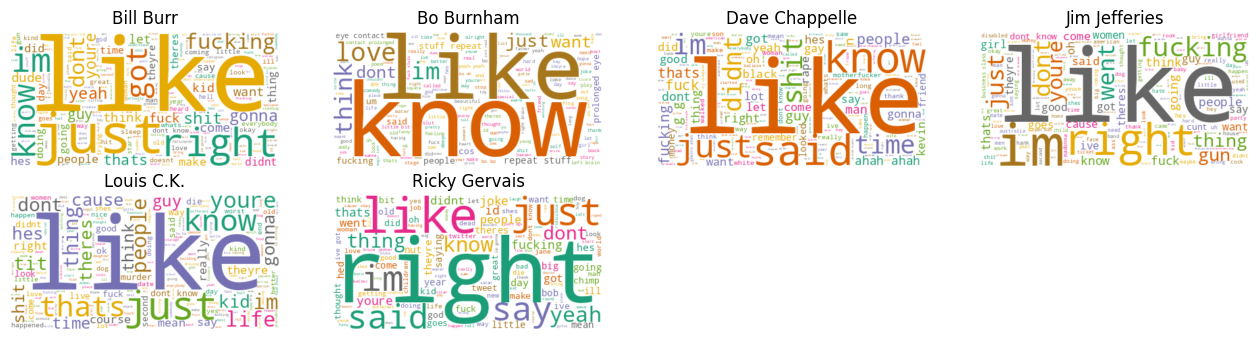

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = [ 'Bill Burr', 'Bo Burnham', 'Dave Chappelle',
              'Jim Jefferies', 'Louis C.K.', 'Ricky Gervais']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])

    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])

plt.show()

# Number of Words
Analysis

In [ ]:
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
0,Bill Burr,2
1,Bo Burnham,2
2,Dave Chappelle,2
3,Jim Jefferies,2
4,Louis C.K.,2
5,Ricky Gervais,2


In [ ]:

# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73]

# Calculate total words for each comedian/document
total_list = [sum(row) for index, row in data_stop.iterrows()]

# Assuming run_times is correct and corresponds to the index/order of data_stop
data_words['total_words'] = total_list
data_words['run_times'] = run_times  # Assuming this matches the order of comedians in data_words
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')


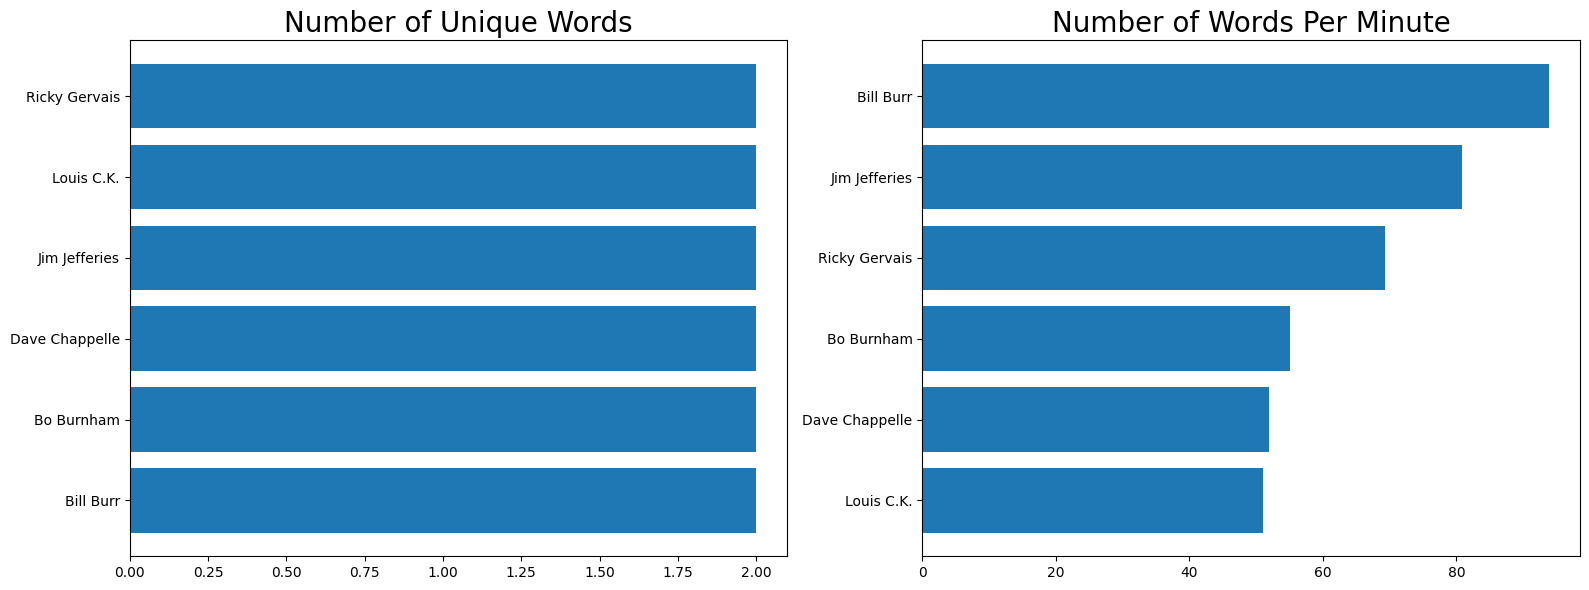

In [ ]:
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

# Amount of Profanity
Analysis

In [ ]:
Counter(words).most_common()


[('i', 6),
 ('you', 6),
 ('s', 6),
 ('a', 6),
 ('and', 6),
 ('the', 6),
 ('it', 6),
 ('to', 6),
 ('that', 6),
 ('of', 6),
 ('in', 6),
 ('like', 6),
 ('t', 6),
 ('is', 6),
 ('he', 6),
 ('this', 5),
 ('my', 5),
 ('just', 4),
 ('re', 4),
 ('know', 4),
 ('they', 4),
 ('on', 4),
 ('m', 4),
 ('we', 4),
 ('your', 4),
 ('what', 4),
 ('don', 3),
 ('all', 3),
 ('was', 3),
 ('but', 3),
 ('right', 3),
 ('there', 2),
 ('for', 2),
 ('me', 2),
 ('so', 2),
 ('she', 2),
 ('if', 1),
 ('get', 1),
 ('ah', 1),
 ('up', 1),
 ('said', 1),
 ('g', 1),
 ('d', 1),
 ('go', 1),
 ('voice', 1),
 ('are', 1),
 ('guy', 1),
 ('with', 1),
 ('bro', 1),
 ('love', 1),
 ('bo', 1),
 ('out', 1),
 ('do', 1),
 ('have', 1),
 ('fucking', 1)]

In [ ]:
# Assuming 'data_stop' is the DataFrame with your document-term matrix
if all(word in data_stop.columns for word in ['fucking', 'fuck', 'shit']):
    data_bad_words = data_stop[['fucking', 'fuck', 'shit']]
    # Sum the counts for 'fucking' and 'fuck' to get a single 'f_word' column
    data_profanity = pd.DataFrame()
    data_profanity['f_word'] = data_bad_words['fucking'] + data_bad_words['fuck']
    data_profanity['s_word'] = data_bad_words['shit']
else:
    print("One or more specified words are not present as features in the DataFrame.")

data_profanity


,f_word,s_word
bill,107,64
bo,38,6
dave,65,46
jim,115,20
louis,21,25
ricky,60,6


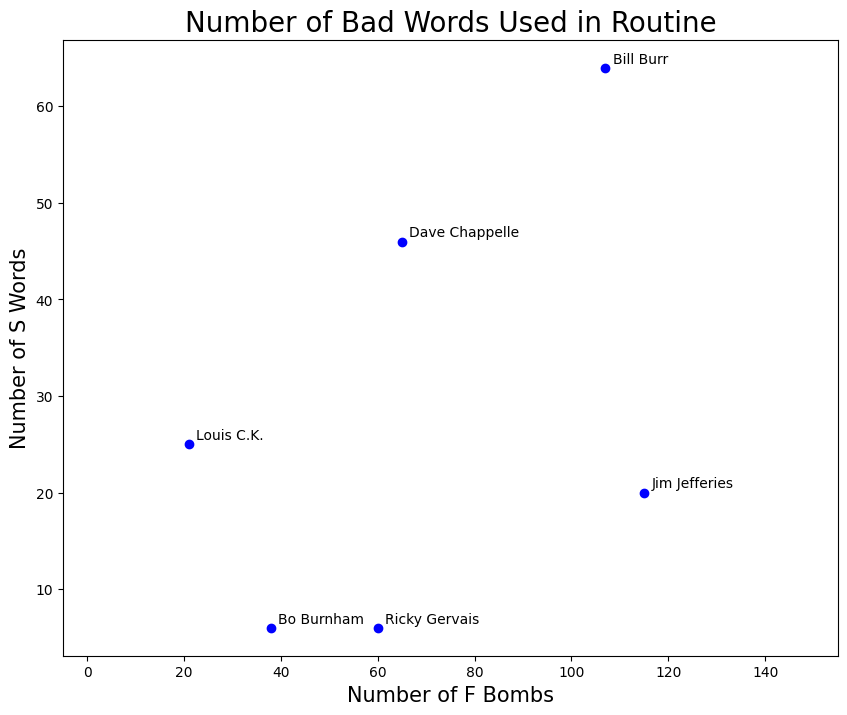

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155)

plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

# **Sentiment Analysis**

# Sentiment of Routine

In [ ]:
data = data_df

In [ ]:
data

,transcript,full_name
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnham
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.
ricky,Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonigh...,Ricky Gervais


In [ ]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr,0.017394,0.537639
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnham,0.076285,0.539174
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle,-0.000943,0.514316
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies,0.046023,0.523520
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.,0.058806,0.516161
ricky,Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonigh...,Ricky Gervais,0.067774,0.497850


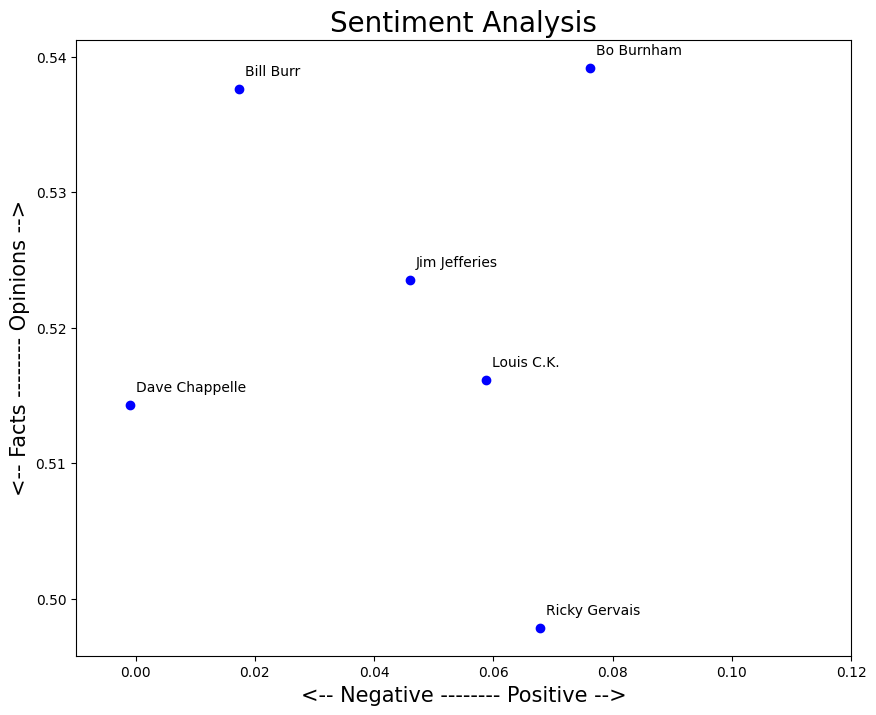

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12)

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

# Sentiment of Routine Over Time

In [ ]:
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
data

,transcript,full_name,polarity,subjectivity
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr,0.017394,0.537639
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnham,0.076285,0.539174
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle,-0.000943,0.514316
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies,0.046023,0.523520
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.,0.058806,0.516161
ricky,Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonigh...,Ricky Gervais,0.067774,0.497850


In [ ]:
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

list_pieces

[['[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a pleasure to be here in the greater Atlanta, Georgia, area, this oasis. It’s nice to be here. I don’t know why I came here in June. It’s nice to be here. Wasn’t thinking. Fucking ridiculously hot out there. Just miserable, horrible. That kind of heat, you understand the racism down here, ya know? I get it. How would you get along with anybody? “Look at ’em just over there, drinkin’ a cold drink! Lemonade was made for the white man!” So… What the hell have I been doing with my life? Trying to get in shape, man. But I hate going to the gym, so I decided I’d go veggie twice a week. It’s brutal. I can only make it till about 5:00. Five o’clock, that’s what I realized about myself, you know that? Something has to die every day in order for me to live. Something’s got to get its beak chopped off, its feathers yanked, uppercut to its jaw, just in 

In [ ]:
len(list_pieces)


6

In [ ]:
len(list_pieces[0])


10

In [ ]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[-0.032260689190037016,
  0.003301963736746346,
  0.034964705969860614,
  0.020883488676856007,
  -0.05097013552895906,
  0.10257615840949173,
  0.023291892514581577,
  -0.03632444865851944,
  -0.011281239446133065,
  0.11207358674463944],
 [0.17482295482295487,
  -0.05915352957589287,
  -0.01911550065231571,
  0.036377338814313605,
  0.06380463622399105,
  -0.03846844293272864,
  0.03523965141612201,
  0.2194906615319776,
  0.18630720470006185,
  0.15380434782608693],
 [-0.05093449586407334,
  -0.0731522199737097,
  0.05497737111373475,
  0.044635222450816504,
  -0.004005456349206347,
  0.08127878160486852,
  -0.13032021268873398,
  -0.09162204234122044,
  -0.030581636831636828,
  0.17640178571428575],
 [0.0900033676665111,
  0.12663816319339574,
  0.09307413036136439,
  -0.019266084393037553,
  -0.0337834189619904,
  0.03964128555712714,
  0.12864437758799174,
  0.06973958333333331,
  -0.04528016829221649,
  0.0024297676008202293],
 [0.0611880068716006,
  0.04079260965749937,
  0.13

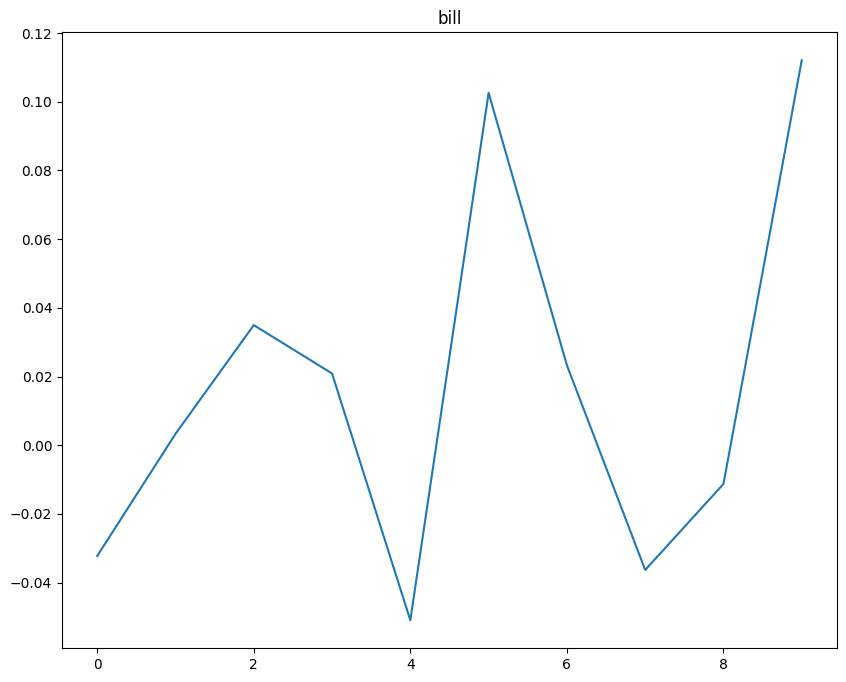

In [ ]:
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

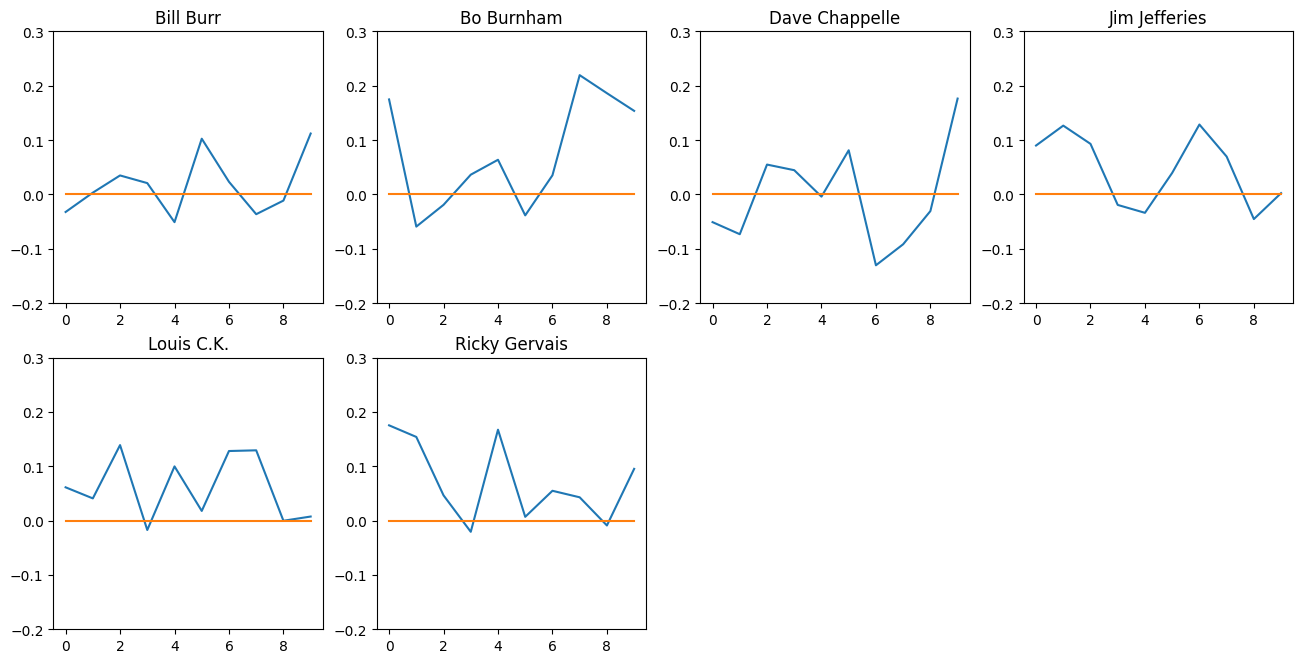

In [ ]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(bottom=-.2, top=.3)

plt.show()

# **Topic Modeling**

# Topic Modeling - Attempt #1 (All Text)

In [ ]:
data = data_stop

In [ ]:
data

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abcs,ability,abject,able,...,youve,yulin,yummy,ze,zero,zillion,zombie,zombies,zoning,zoo
bill,1,0,0,0,0,0,1,0,0,1,...,1,0,1,1,1,1,1,1,1,0
bo,0,1,1,1,0,0,0,1,0,0,...,9,0,0,0,1,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,1,...,11,0,0,0,0,0,0,0,0,0
louis,0,0,0,0,0,3,0,0,0,1,...,0,0,0,0,2,0,0,0,0,0
ricky,0,0,0,0,0,0,0,1,1,2,...,10,1,1,0,0,0,0,0,0,1


In [ ]:
from gensim import matutils, models
import scipy.sparse

In [ ]:
tdm = data.transpose()
tdm.head()

,bill,bo,dave,jim,louis,ricky
aaaaah,1,0,0,0,0,0
aaaaahhhhhhh,0,1,0,0,0,0
aaaaauuugghhhhhh,0,1,0,0,0,0
aaaahhhhh,0,1,0,0,0,0
aaah,0,0,1,0,0,0


In [ ]:
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [ ]:
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [ ]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.022*"like" + 0.018*"just" + 0.014*"right" + 0.014*"know" + 0.013*"im" + 0.012*"dont" + 0.009*"youre" + 0.008*"thats" + 0.008*"yeah" + 0.007*"fucking"'),
 (1,
  '0.019*"like" + 0.013*"im" + 0.013*"know" + 0.011*"dont" + 0.011*"just" + 0.010*"fucking" + 0.009*"right" + 0.008*"said" + 0.008*"people" + 0.007*"thats"')]

In [ ]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.016*"like" + 0.015*"right" + 0.014*"im" + 0.012*"dont" + 0.011*"know" + 0.011*"just" + 0.010*"fucking" + 0.007*"youre" + 0.007*"said" + 0.007*"went"'),
 (1,
  '0.001*"like" + 0.001*"im" + 0.001*"right" + 0.001*"just" + 0.001*"know" + 0.001*"yeah" + 0.001*"dont" + 0.001*"got" + 0.001*"thats" + 0.001*"fucking"'),
 (2,
  '0.028*"like" + 0.021*"just" + 0.017*"know" + 0.014*"im" + 0.013*"dont" + 0.012*"right" + 0.009*"thats" + 0.009*"shit" + 0.009*"gonna" + 0.008*"youre"')]

In [ ]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.029*"like" + 0.021*"just" + 0.017*"know" + 0.014*"im" + 0.013*"dont" + 0.012*"right" + 0.010*"thats" + 0.009*"shit" + 0.009*"gonna" + 0.009*"youre"'),
 (1,
  '0.002*"like" + 0.001*"just" + 0.001*"im" + 0.001*"right" + 0.001*"dont" + 0.001*"know" + 0.001*"gonna" + 0.001*"youre" + 0.001*"people" + 0.001*"shit"'),
 (2,
  '0.017*"right" + 0.017*"like" + 0.015*"im" + 0.013*"dont" + 0.012*"just" + 0.011*"fucking" + 0.011*"know" + 0.009*"went" + 0.008*"youre" + 0.007*"said"'),
 (3,
  '0.011*"know" + 0.010*"like" + 0.009*"love" + 0.008*"im" + 0.008*"think" + 0.008*"just" + 0.008*"bo" + 0.007*"stuff" + 0.007*"repeat" + 0.007*"dont"')]

# Topic Modeling - Attempt #2 (Nouns Only)

In [ ]:
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)]
    return ' '.join(all_nouns)

In [ ]:
data_clean

,transcript
bill,all right thank you thank you very much thank you thank you thank you how are you whats going on thank you its a pleasure to be here in the great...
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this i...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...
louis,introfade the music out lets roll hold there lights do the lights thank you thank you very much i appreciate that i dont necessarily agree with yo...
ricky,hello hello how you doing great thank you wow calm down shut the fuck up thank you what a lovely welcome im gonna try my hardest tonight youre thi...


In [ ]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

,transcript
bill,thank thank pleasure georgia area oasis i june kind heat racism anybody look em drink lemonade man hell life shape man hate gym id week brutal i o...
bo,macdonald farm e i o farm pig e i i snort macdonald farm e i hes years male product giraffe sex degeneres head nipples hes years pursuit comedy re...
dave,jokes living stare work profound train thought alchemists transforms levity livelihood trance ♪ workinonit ♪♪ tune ♪♪ ♪ ♪ ♪♪ ahah ♪♪ ghetto ♪♪ aha...
jim,ladies gentlemen stage mr jim jefferies thank thats end tour tour i child ah time home i girlfriend pregnant months life decisions girl i way prob...
louis,music lets lights lights thank i i place place miles direction building shit town sentence i difference sidewalk street pedestrians people kind wa...
ricky,hello thank fuck thank im gon youre weve moneys legend shut im guy round people sort jesus way show humanity dont i fan i dogs dogs people people ...


In [ ]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']

# Convert the union of ENGLISH_STOP_WORDS and add_stop_words to a list
stop_words = list(text.ENGLISH_STOP_WORDS.union(add_stop_words))

# Assuming data_nouns is a DataFrame with a 'transcript' column containing only nouns
# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns['transcript'])
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names_out())
data_dtmn.index = data_nouns.index

data_dtmn

,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aah,abcs,ability,abortions,absurdities,acc,accent,...,youth,youtube,youve,yulin,yummy,ze,zillion,zombie,zombies,zoo
bill,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,1,1,1,0
bo,1,1,1,0,0,1,0,1,1,0,...,0,0,4,0,0,0,0,0,0,0
dave,0,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,1,0,4,...,0,0,7,0,0,0,0,0,0,0
louis,0,0,0,3,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
ricky,0,0,0,0,0,1,0,1,0,0,...,0,1,3,1,1,0,0,0,0,1


In [ ]:
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [ ]:
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.010*"man" + 0.009*"shit" + 0.009*"fuck" + 0.009*"day" + 0.008*"thing" + 0.008*"women" + 0.007*"ahah" + 0.007*"guy" + 0.007*"lot" + 0.006*"cause"'),
 (1,
  '0.011*"thing" + 0.011*"life" + 0.010*"hes" + 0.008*"shit" + 0.007*"day" + 0.007*"man" + 0.007*"gon" + 0.006*"way" + 0.006*"years" + 0.006*"guy"')]

In [ ]:
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.013*"thing" + 0.013*"life" + 0.011*"hes" + 0.008*"day" + 0.007*"joke" + 0.007*"years" + 0.007*"kids" + 0.007*"things" + 0.006*"way" + 0.006*"course"'),
 (1,
  '0.012*"shit" + 0.011*"man" + 0.009*"thing" + 0.009*"fuck" + 0.009*"day" + 0.008*"guy" + 0.008*"hes" + 0.006*"life" + 0.006*"way" + 0.006*"women"'),
 (2,
  '0.001*"day" + 0.001*"man" + 0.001*"hes" + 0.001*"fuck" + 0.001*"cause" + 0.001*"guy" + 0.001*"thing" + 0.001*"life" + 0.001*"way" + 0.001*"shit"')]

In [ ]:
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.015*"day" + 0.013*"thing" + 0.010*"guns" + 0.010*"women" + 0.009*"cause" + 0.008*"fuck" + 0.008*"guy" + 0.007*"man" + 0.007*"ass" + 0.007*"fucking"'),
 (1,
  '0.011*"joke" + 0.010*"thing" + 0.009*"years" + 0.009*"day" + 0.008*"hes" + 0.008*"id" + 0.007*"things" + 0.006*"nuts" + 0.006*"jenner" + 0.005*"woman"'),
 (2,
  '0.001*"hes" + 0.001*"shit" + 0.001*"man" + 0.001*"life" + 0.001*"way" + 0.001*"thing" + 0.001*"day" + 0.000*"fuck" + 0.000*"cause" + 0.000*"guy"'),
 (3,
  '0.014*"shit" + 0.011*"life" + 0.011*"man" + 0.010*"hes" + 0.010*"thing" + 0.008*"guy" + 0.008*"fuck" + 0.007*"way" + 0.007*"gon" + 0.006*"lot"')]

# Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [ ]:
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)]
    return ' '.join(nouns_adj)

In [ ]:
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

,transcript
bill,right thank thank pleasure greater atlanta georgia area oasis nice i i june nice wasnt miserable horrible kind heat racism i anybody look em cold ...
bo,old macdonald farm e i i o farm pig e i i snort old macdonald farm e i i bo burnham hes years old male genetic product giraffe sex ellen degeneres...
dave,dirty jokes living stare most hard work profound train thought alchemists transforms levity livelihood trance ♪ ♪♪ ♪♪ workinonit ♪♪ ♪♪ tune ♪♪ ♪ ♪...
jim,ladies gentlemen welcome stage mr jim jefferies thank i uh thats end tour im happy tour i child ah time home good um i girlfriend pregnant months ...
louis,music lets lights lights thank much i i i nice place nicest place many miles direction building shit town sentence odd i difference sidewalk stree...
ricky,hello great thank fuck thank lovely welcome im gon hardest tonight youre relax weve moneys worth legend shut god im ordinary guy round people sort...


In [ ]:
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names_out())
data_dtmna.index = data_nouns_adj.index
data_dtmna


,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aah,abcs,ability,abject,able,ablebodied,...,youtube,youve,yulin,yummy,ze,zero,zillion,zombie,zombies,zoo
bill,1,0,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,1,1,1,0
bo,0,1,1,1,0,0,1,0,0,0,...,0,4,0,0,0,1,0,0,0,0
dave,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,1,2,...,0,9,0,0,0,0,0,0,0,0
louis,0,0,0,0,3,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
ricky,0,0,0,0,0,0,1,1,2,0,...,1,7,1,1,0,0,0,0,0,1


In [ ]:
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [ ]:
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.006*"joke" + 0.006*"bo" + 0.005*"repeat" + 0.005*"eye" + 0.004*"tit" + 0.004*"contact" + 0.004*"brain" + 0.004*"ha" + 0.004*"ok" + 0.003*"rape"'),
 (1,
  '0.006*"ahah" + 0.005*"gun" + 0.005*"guns" + 0.004*"everybody" + 0.004*"ass" + 0.004*"wife" + 0.003*"class" + 0.003*"girlfriend" + 0.003*"kind" + 0.003*"american"')]

In [ ]:
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.007*"joke" + 0.005*"gun" + 0.005*"guns" + 0.005*"ass" + 0.004*"hell" + 0.004*"class" + 0.004*"girlfriend" + 0.003*"funny" + 0.003*"cunt" + 0.003*"everybody"'),
 (1,
  '0.011*"ahah" + 0.006*"tit" + 0.005*"young" + 0.004*"everybody" + 0.004*"ok" + 0.004*"murder" + 0.004*"ha" + 0.004*"kind" + 0.004*"date" + 0.004*"oj"'),
 (2,
  '0.014*"bo" + 0.012*"repeat" + 0.009*"eye" + 0.009*"contact" + 0.008*"cos" + 0.007*"brain" + 0.007*"um" + 0.006*"sad" + 0.005*"song" + 0.005*"sluts"')]

In [ ]:
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.000*"everybody" + 0.000*"joke" + 0.000*"gun" + 0.000*"class" + 0.000*"ass" + 0.000*"ahah" + 0.000*"guns" + 0.000*"um" + 0.000*"wife" + 0.000*"girl"'),
 (1,
  '0.011*"bo" + 0.009*"repeat" + 0.008*"eye" + 0.007*"contact" + 0.007*"tit" + 0.006*"ok" + 0.006*"cos" + 0.006*"brain" + 0.005*"ha" + 0.005*"um"'),
 (2,
  '0.017*"ahah" + 0.006*"ghetto" + 0.006*"oj" + 0.005*"young" + 0.005*"motherfucker" + 0.005*"kevin" + 0.004*"wife" + 0.004*"friend" + 0.004*"mad" + 0.004*"american"'),
 (3,
  '0.007*"joke" + 0.006*"gun" + 0.005*"guns" + 0.005*"ass" + 0.005*"hell" + 0.004*"class" + 0.004*"girlfriend" + 0.004*"funny" + 0.004*"cunt" + 0.003*"everybody"')]

# Identify Topics in Each Document

In [ ]:
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.008*"everybody" + 0.007*"gun" + 0.006*"jesus" + 0.005*"kind" + 0.005*"helicopter" + 0.005*"hell" + 0.005*"sudden" + 0.005*"religion" + 0.004*"anybody" + 0.004*"wife"'),
 (1,
  '0.011*"bo" + 0.009*"repeat" + 0.008*"eye" + 0.007*"contact" + 0.007*"tit" + 0.006*"ok" + 0.006*"cos" + 0.006*"brain" + 0.005*"ha" + 0.005*"um"'),
 (2,
  '0.012*"joke" + 0.006*"jenner" + 0.006*"hampstead" + 0.006*"chimp" + 0.006*"rape" + 0.005*"funny" + 0.005*"twitter" + 0.005*"jane" + 0.005*"tweet" + 0.004*"jokes"'),
 (3,
  '0.010*"ahah" + 0.007*"guns" + 0.005*"ass" + 0.005*"girlfriend" + 0.004*"american" + 0.004*"girl" + 0.004*"business" + 0.004*"class" + 0.004*"gun" + 0.004*"cunt"')]

In [ ]:
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(0, 'bill'), (1, 'bo'), (3, 'dave'), (3, 'jim'), (1, 'louis'), (2, 'ricky')]